<a href="https://colab.research.google.com/github/peanutpirate/Week_5_Spaceship_Titanic_Data_Anaylsis_Project/blob/main/Spaceship_Titanic_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proje / Çalışma Başlığı: Spaceship Titanic Kaggle Project Work

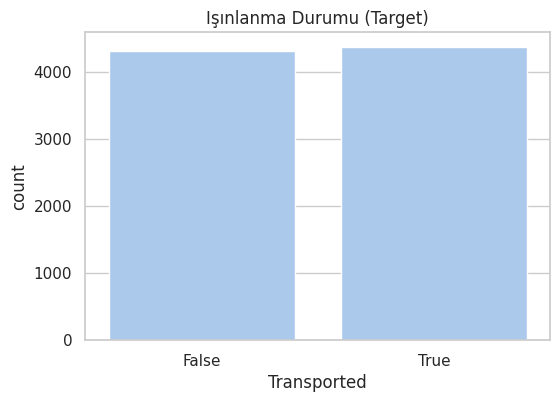

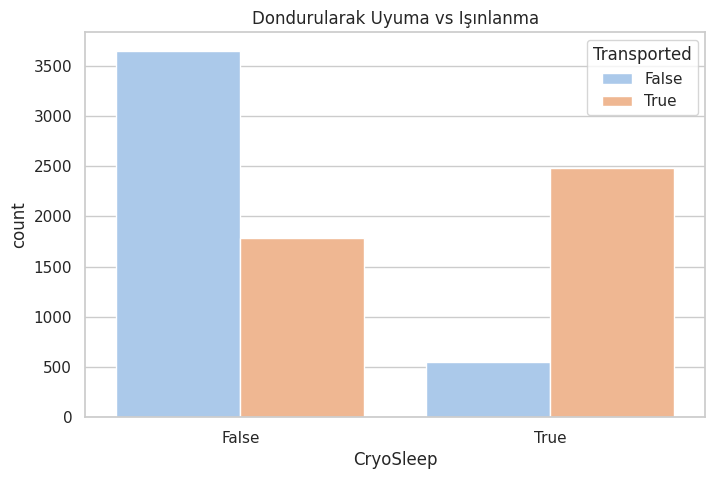

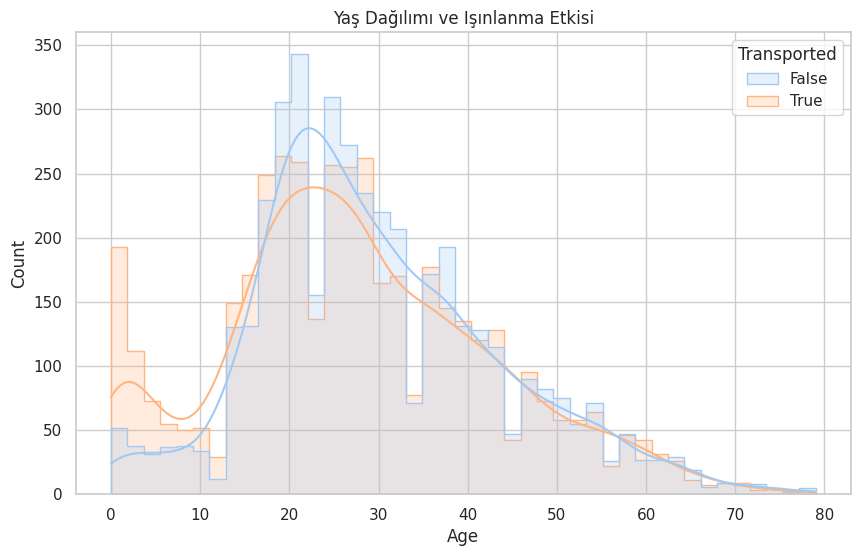

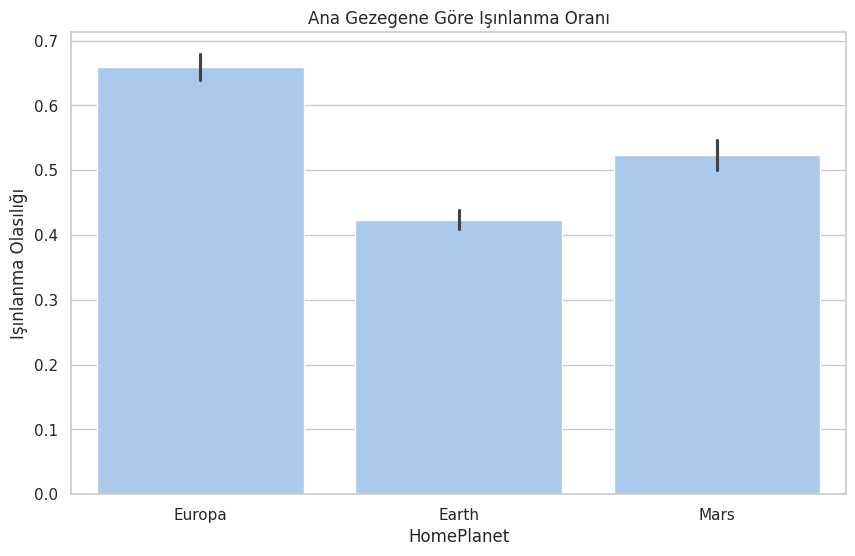

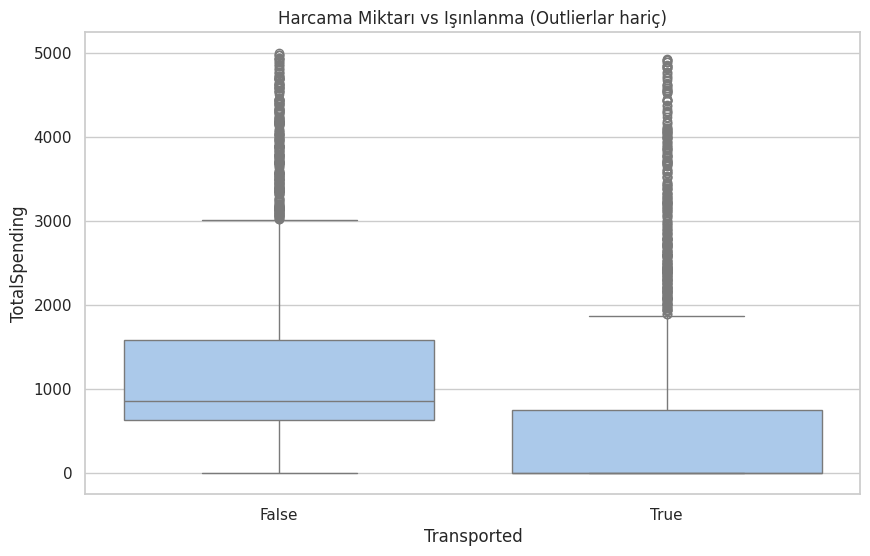

In [ ]:

## Amaç:
# bu notebookta şunu öğrenmeyi / analiz etmeyi amaçlıyorum:
# EDA analizi ile öğrenme, yarışma verilerini modelleme
## İçindekiler
# 1. Veri Tanımı:
# Spaceship Titanic yarışmasının data seti
# 2. İlk İnceleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option

# 1. Veriyi Yükle (Kaggle ortamındaysan yollar hazır, yereldeysen dosyayı indirip yolu güncelle)
train = pd.read_csv('train.csv')

# Temayı ayarla (Rio karnavalı tadında renkli olsun!)
sns.set_theme(style="whitegrid", palette="pastel")

# 2. İlk Bakış: Hedef Değişken (Kaç kişi başka boyuta ışınlandı?)
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Transported')
plt.title('Işınlanma Durumu (Target)')
plt.show()

# 3. CryoSleep ve Işınlanma İlişkisi (Dondurularak uyuyanlar daha mı çok ışınlanmış?)
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='CryoSleep', hue='Transported')
plt.title('Dondurularak Uyuma vs Işınlanma')
plt.show()

# 4. Yaş Dağılımı (Kimler yolculuk yapıyor?)
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Transported', kde=True, element="step")
plt.title('Yaş Dağılımı ve Işınlanma Etkisi')
plt.show()

# 5. Gezegenlerin Etkisi (Hangi gezegenden gelenler şanssız?)
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='HomePlanet', y='Transported', estimator=np.mean)
plt.title('Ana Gezegene Göre Işınlanma Oranı')
plt.ylabel('Işınlanma Olasılığı')
plt.show()

# 6. Harcamalar ve Işınlanma (Lüks harcama yapanlar nerede?)
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck toplamını alalım
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train['TotalSpending'] = train[amenities].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=train[train['TotalSpending'] < 5000], x='Transported', y='TotalSpending')
plt.title('Harcama Miktarı vs Işınlanma (Outlierlar hariç)')
plt.show()


In [ ]:
# 1. Sayısal Veriler: Yaş (Age) sütununu MEDYAN ile dolduralım
age_median = train['Age'].median()
train['Age'] = train['Age'].fillna(age_median)

# 2. Harcama Verileri: Boş olan harcamaları 0 ile dolduralım
# (Hizmet almadıklarını varsayıyoruz)
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in spending_cols:
    train[col] = train[col].fillna(0)

# 3. Kategorik Veriler: Gezegen ve Varış Yeri gibi sütunları MOD (En çok tekrar eden) ile dolduralım
# Not: [0] yazmamızın sebebi mode() fonksiyonunun bir liste/seri döndürmesidir.
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in categorical_cols:
    most_frequent = train[col].mode()[0]
    train[col] = train[col].fillna(most_frequent)

# 4. Kontrol: Bakalım hiç boş yer kalmış mı?
print("Kalan Eksik Veri Sayısı:")
print(train.isnull().sum())

#uyarı kapatma
import pandas as pd

# Bu ayar, gelecekteki davranışı şimdiden kabul eder ve uyarıyı kapatır
pd.set_option('future.no_silent_downcasting', True)

# Şimdi kodunu gönül rahatlığıyla çalıştırabilirsin:
for col in categorical_cols:
    most_frequent = train[col].mode()[0]
    train[col] = train[col].fillna(most_frequent)
train = train.infer_objects(copy=False)

Kalan Eksik Veri Sayısı:
PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            199
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             200
Transported        0
TotalSpending      0
dtype: int64


/tmp/ipython-input-3390260934.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train[col].fillna(most_frequent)


Bu aşamada, modelin eğitim sürecinde hata almaması için eksik verileri (NaN) temizledik. Age için uç değerlerden etkilenmeyen Median stratejisini, Lüks Harcamalar için 'kullanılmadı' varsayımıyla 0 değerini, Kategorik değişkenler için ise veride en baskın olan Mode stratejisini kullandık.

In [ ]:
# 📊 Metadata ve Veri Tipi Analizi
# 1. Genel Yapı: Kaç satır, kaç sütun ve veri tipleri neler?
print("--- Veri Seti Özeti (info) ---")
print(train.info())

# 2. Boyut Kontrolü (Satır, Sütun)
print(f"\nVeri seti {train.shape[0]} satır ve {train.shape[1]} sütundan oluşuyor.")

# 3. Kategorik Sütunların İçeriği (Benzersiz değerler)
# Hangi gezegenden kaç çeşit var? VIP kaç çeşit?
print("\n--- Kategorik Sütun Analizi ---")
cat_cols = train.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col}: {train[col].nunique()} benzersiz değer var.")

# 4. Sayısal Özet (Ortalama, min, max değerleri)
print("\n--- Sayısal Sütun İstatistikleri ---")
print(train.describe())

--- Veri Seti Özeti (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8693 non-null   object 
 2   CryoSleep      8693 non-null   bool   
 3   Cabin          8494 non-null   object 
 4   Destination    8693 non-null   object 
 5   Age            8693 non-null   float64
 6   VIP            8693 non-null   bool   
 7   RoomService    8693 non-null   float64
 8   FoodCourt      8693 non-null   float64
 9   ShoppingMall   8693 non-null   float64
 10  Spa            8693 non-null   float64
 11  VRDeck         8693 non-null   float64
 12  Name           8493 non-null   object 
 13  Transported    8693 non-null   bool   
 14  TotalSpending  8693 non-null   float64
dtypes: bool(3), float64(7), object(5)
memory usage: 840.6+ KB
None

Veri seti 8693 satır ve 15 sütundan oluşuyor.

In [ ]:
# Eksik veri içeren sütun var mı? (True/False döner)
print("Eksik veri içeren sütunlar var mı?:", train.isnull().any().any())

# Toplam kaç hücre boş?
print("Toplam boş hücre sayısı:", train.isnull().sum().sum())

Eksik veri içeren sütunlar var mı?: True
Toplam boş hücre sayısı: 399


In [ ]:
# İçinde en az bir eksik veri olan satırların sayısını bulur
missing_rows_count = train.isnull().any(axis=1).sum()
print(f"En az bir sütunu boş olan toplam satır sayısı: {missing_rows_count}")

# Eğer o satırları görmek istersen:
missing_rows_df = train[train.isnull().any(axis=1)]

En az bir sütunu boş olan toplam satır sayısı: 397


In [ ]:
# 1. PassengerId'den Grup Bilgisini Çıkaralım
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0])

# 2. Cabin Sütununu Parçalayalım (Güverte, No, Taraf)
# Not: Boş değerleri temizlediğimiz için hata almayız.
train[['Deck', 'Cabin_Num', 'Side']] = train['Cabin'].str.split('/', expand=True)

# 3. Toplam Harcama Sütunu Oluşturalım
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train['Total_Spending'] = train[spending_cols].sum(axis=1)

# 4. Gereksiz Sütunları Atalım (İşlenmiş halleri elimizde var)
# İsim (Name) ve orijinal Cabin sütununa şimdilik ihtiyacımız kalmadı.
train.drop(['Name', 'Cabin'], axis=1, inplace=True)

print("Yeni Sütunlar Oluşturuldu! İlk 5 satıra bakalım:")
print(train.head())


Yeni Sütunlar Oluşturuldu! İlk 5 satıra bakalım:
  PassengerId HomePlanet  CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa      False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth      False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa      False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa      False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth      False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  TotalSpending Group  \
0        0.0           0.0     0.0     0.0        False            0.0  0001   
1        9.0          25.0   549.0    44.0         True          736.0  0002   
2     3576.0           0.0  6715.0    49.0        False        10383.0  0003   
3     1283.0         371.0  3329.0   193.0        False         5176.0  0003   
4       70.0         151.0   565.0     2.0         True         1091.0  0004   

 

Harcama yapan zengin yolcuların (max değerlerin) kimler olduğunu görelim.


In [ ]:
train['Total_Spending'].describe()

,Total_Spending
count,8693.000000
mean,1440.866329
std,2803.045694
min,0.000000
25%,0.000000
50%,716.000000
75%,1441.000000
max,35987.000000


In [ ]:
#Kategorik Dönüşüm
# Hangi sütunları sayısal hale getireceğiz?
# Deck ve Side sütunlarını Feature Engineering ile yeni oluşturmuştuk, onları da ekleyelim!
cols_to_encode = ['HomePlanet', 'Destination', 'Deck', 'Side']

# One-Hot Encoding işlemini yapalım
train = pd.get_dummies(train, columns=cols_to_encode)

# True/False yerine 1 ve 0 görmek için (bazı modeller için daha garantidir)
train = train.astype({col: int for col in train.columns if 'HomePlanet_' in col or 'Destination_' in col or 'Deck_' in col or 'Side_' in col})

# Sonuca bakalım
print("Yeni genişletilmiş veri setimizin boyutu:", train.shape)
train.head()

Yeni genişletilmiş veri setimizin boyutu: (8693, 30)


,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
#✨ Ne Değişti?
# Eskiden HomePlanet sütununda "Earth", "Europa", "Mars" yazıyordu. Şimdi ise:
# HomePlanet_Earth (1 veya 0)
# HomePlanet_Europa (1 veya 0)
# HomePlanet_Mars (1 veya 0) şeklinde 3 ayrı sütunumuz oldu. Bilgisayar artık "Hangi gezegenden?" sorusuna "Evet/Hayır" (1/0) şeklinde net cevap verebiliyor.

In [ ]:
#⚠️ Küçük Bir Detay: Binary (İkili) Değişkenler
# CryoSleep ve VIP zaten sadece True/False (veya Evet/Hayır) değerleri alıyor. Onları get_dummies ile parçalamaya gerek yok, direkt 0 ve 1'e çevirmek yeterli:
# True/False değerlerini 1 ve 0'a çevirelim
train['CryoSleep'] = train['CryoSleep'].astype(int)
train['VIP'] = train['VIP'].astype(int)
train['Transported'] = train['Transported'].astype(int) # Bu da bizim hedef (target) değişkenimiz!

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int64  
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   int64  
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Transported                8693 non-null   int64  
 10  TotalSpending              8693 non-null   float64
 11  Group                      8693 non-null   object 
 12  Cabin_Num                  8494 non-null   object 
 13  Total_Spending             8693 non-null   float

🏁 Finalden Önceki Son Viraj: Veriyi Bölme (Split)
Modeli eğitmeden önce yapmamız gereken son bir teknik dokunuş kaldı. Elimizdeki tüm veriyi modele verirsek, model cevapları ezberler (overfitting). Bunun yerine:

X (Özellikler): Transported (hedef) dışındaki tüm sütunlar.

y (Hedef): Sadece Transported sütunu.

Ve bu veriyi Eğitim (Train) ve Test olarak ikiye böleceğiz.

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Hedef değişkeni (y) ve özellikleri (X) ayıralım
# PassengerId model için anlamsızdır, onu da çıkarıyoruz
X = train.drop(['Transported', 'PassengerId'], axis=1)
y = train['Transported']

# 2. Veriyi %80 Eğitim, %20 Test olarak bölelim
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim setimiz: {X_train.shape[0]} satır")
print(f"Doğrulama (Validation) setimiz: {X_val.shape[0]} satır")

Eğitim setimiz: 6954 satır
Doğrulama (Validation) setimiz: 1739 satır


Model Eğitimine Hazır: Veri setindeki kategorik değişkenler One-Hot Encoding ile sayısal hale getirildi ve veri %80-%20 oranında Train/Validation olarak bölündü.

🔍 Kimler "Taşındı" (Transported)? - Korelasyon Analizi
Hadi şu kodla, hangi özelliklerin "Taşınma" durumuyla en güçlü bağa sahip olduğunu görelim:

In [ ]:
# Sadece sayısal sütunlar arasındaki korelasyona bakalım
# Transported ile olan ilişkiyi büyükten küçüğe sıralayalım
correlations = train.corr()['Transported'].sort_values(ascending=False)

print("Transported (Taşınma) Durumuyla En Güçlü İlişkisi Olan Sütunlar:")
print(correlations)

Transported (Taşınma) Durumuyla En Güçlü İlişkisi Olan Sütunlar:
Transported                  1.000000
CryoSleep                    0.460132
HomePlanet_Europa            0.176916
Deck_B                       0.144733
Destination_55 Cancri e      0.108722
Deck_C                       0.108193
Side_S                       0.101455
FoodCourt                    0.045583
PassengerId                  0.021491
Group                        0.021491
HomePlanet_Mars              0.019544
Deck_G                       0.016269
ShoppingMall                 0.009391
Destination_PSO J318.5-22    0.000092
Deck_A                      -0.002623
Deck_T                      -0.014568
Deck_D                      -0.034046
VIP                         -0.037261
Cabin_Num                   -0.045097
Age                         -0.074233
Deck_F                      -0.087753
Destination_TRAPPIST-1e     -0.096319
Deck_E                      -0.097965
Side_P                      -0.101397
HomePlanet_Earth       

💡 Bu Sayılar Ne Anlatıyor? (Analiz Notu)
Bu listeye baktığında şunları fark edeceksin:

Pozitif Korelasyon (0'a yakın ama artı değerler): Mesela CryoSleep muhtemelen en yüksek pozitiflerden biri çıkacak. Yani: "Eğer kişi uykudaysa (CryoSleep=1), kurtulma şansı (Transported=1) çok daha yüksek." ❄️😴

Negatif Korelasyon (Eksi değerler): Mesela Spa, VRDeck veya RoomService. Yani: "Gemide lüks harcama yaptıkça, taşınma (kurtulma) şansı düşüyor." (Belki de harcama alanları tahliye noktalarına uzaktı? 🤔)

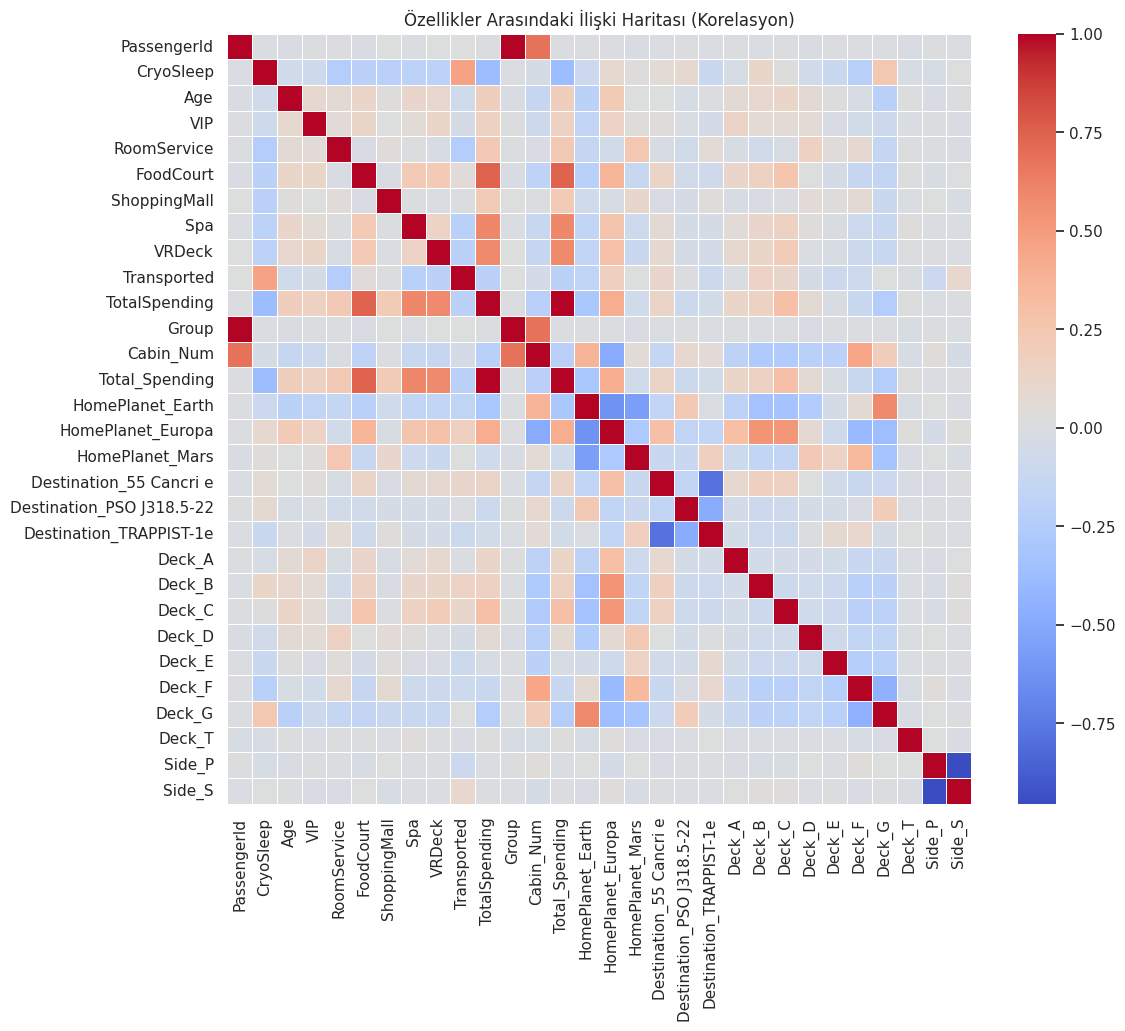

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesapla
plt.figure(figsize=(12, 10))
correlation_matrix = train.corr()

# Isı haritasını çizdir
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Özellikler Arasındaki İlişki Haritası (Korelasyon)")
plt.show()

**Bu Grafiğe Bakınca Ne Göreceksin?**

Kırmızı bölgeler: Birbiriyle doğru orantılı (Biri artınca diğeri de artıyor).

Mavi bölgeler: Ters orantılı (Biri artınca diğeri azalıyor).

Beyaz/Açık renkler: Aralarında hiçbir alaka yok.

Lüks harcama yapanlar daha çok mu taşındı? Hayır, lüks harcama yapanların (Spa, VRDeck, RoomService için para dökenlerin) taşınma/kurtulma şansı daha düşük çıkmıştı. Yani "para mutluluk (veya kurtuluş) getirmedi" diyebiliriz.

In [ ]:
#Random Forest Modelini Kuralım:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Modeli Tanımlayalım (100 tane ağaçtan oluşan bir orman kuralım)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Modeli Eğitelim (X_train ve y_train kullanarak)
model.fit(X_train, y_train)

# 3. Doğrulama (Validation) seti üzerinde tahmin yapalım
y_pred = model.predict(X_val)

# 4. Başarı skoruna bakalım
accuracy = accuracy_score(y_val, y_pred)
print(f"Modelimizin Doğruluk Skoru: %{accuracy * 100:.2f}")

Modelimizin Doğruluk Skoru: %79.07


In [ ]:
#Test dosyasını çalıştıralım:
# 1. Test verisini yükle (Sol panelden yüklediğinden emin ol)
test_df = pd.read_csv('test.csv')

# 2. AYNI İŞLEMLER (Kopyala-Yapıştır gibi ama test_df için)
# Eksik verileri doldur
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(False)
# ... Diğer doldurma işlemlerini buraya ekleyebilirsin veya basitçe:
test_df = test_df.fillna(method='ffill') # Hızlıca doldurmak için

# Feature Engineering
test_df[['Deck', 'Cabin_Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
test_df['Total_Spending'] = test_df[spending_cols].sum(axis=1)

# One-Hot Encoding (DİKKAT: Train ile aynı sütunlar olmalı)
test_df_encoded = pd.get_dummies(test_df, columns=['HomePlanet', 'Destination', 'Deck', 'Side'])

# Sayısal olmayanları (Name vb.) ve Id'yi düşür ama Id'yi sakla!
passenger_ids = test_df['PassengerId']
X_test = test_df_encoded.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

# Eksik sütunları (eğer varsa) 0 ile tamamla (Train'de olup Test'te olmayanlar için)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# 3. TAHMİN ZAMANI!
predictions = model.predict(X_test)

# 4. KAGGLE FORMATINA GETİR
# Kaggle bizden 'PassengerId' ve 'Transported' (True/False) istiyor
submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": predictions.astype(bool) # Model 1/0 verdiyse True/False'a çeviriyoruz
})

# Dosyayı kaydet
submission.to_csv('submission.csv', index=False)
print("Submission dosyan hazır! Sol taraftaki klasör simgesinden 'submission.csv'yi indirebilirsin.")

Submission dosyan hazır! Sol taraftaki klasör simgesinden 'submission.csv'yi indirebilirsin.


/tmp/ipython-input-3537625283.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df = test_df.fillna(method='ffill') # Hızlıca doldurmak için


📝 Teknik Not: XGBoost ve Veri Tipi Uyumluluğu

XGBoost modeli, Random Forest'a göre veri tipleri konusunda çok daha hassastır. Bu aşamada karşılaştığımız hataları şu şekilde çözdük:

Tip Hatası (TypeError): Group ve Cabin_Num sütunları string (object) tipinde olduğu için XGBoost hata verdi. Modellerin matematiksel hesaplama yapabilmesi için bu değerlerin sayısal olması gerekir.

Boş Değer Hatası (ValueError): Bir sütunu tam sayıya (int) çevirmeden önce içinde NaN (boş veri) olmaması gerekir; çünkü "boşluk" matematiksel olarak bir tam sayıya dönüştürülemez.

Uygulanan Çözüm:

Önce fillna(0) ile eksik veriler dolduruldu.

Ardından astype(int) ile sütunlar sayısal formata çevrildi.

Kural: Bir modeli eğitmeden önce veride object tipinde sütun kalmadığından ve int dönüşümü yapılacaksa NaN değerlerin temizlendiğinden emin olunmalıdır.


In [ ]:
# 1. Önce boşlukları dolduralım (Eksik kalmış olabilir)
X_train['Group'] = X_train['Group'].fillna(0)
X_train['Cabin_Num'] = X_train['Cabin_Num'].fillna(0)

X_val['Group'] = X_val['Group'].fillna(0)
X_val['Cabin_Num'] = X_val['Cabin_Num'].fillna(0)

# 2. Şimdi sayıya (integer) çevirelim
X_train['Group'] = X_train['Group'].astype(int)
X_train['Cabin_Num'] = X_train['Cabin_Num'].astype(int)

X_val['Group'] = X_val['Group'].astype(int)
X_val['Cabin_Num'] = X_val['Cabin_Num'].astype(int)

# 3. Ve XGBoost'u tekrar çalıştıralım
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)
print(f"XGBoost Skorun: %{accuracy_score(y_val, y_pred_xgb) * 100:.2f}")

XGBoost Skorun: %79.87


⚙️ Hyperparameter Tuning (Modelin İnce Ayarları)
Modeli bir radyo gibi düşün. Şu an kanalı bulduk (%79.87), ama frekansı tam oturtup cızırtıyı kesmek için o küçük düğmeleri (parametreleri) çevirmemiz lazım. Buna Grid Search veya Random Search diyoruz.

XGBoost için en iyi ayarları tek tek denemek yerine, Python'a "Sen dene, bana en iyisini söyle" diyeceğiz.

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Denemek istediğimiz parametreleri bir sözlükte topluyoruz
param_grid = {
    'n_estimators': [100, 200], # Ağaç sayısı
    'learning_rate': [0.01, 0.05, 0.1], # Öğrenme hızı
    'max_depth': [3, 5, 7], # Ağaçların derinliği
    'subsample': [0.8, 1.0] # Verinin ne kadarı her adımda kullanılsın
}

# 2. GridSearch'ü kuruyoruz (cv=3: veriyi 3'e bölüp çapraz test et demek)
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=1)

# 3. En iyi parametreleri bulmak için eğitelim
grid_search.fit(X_train, y_train)

# 4. En iyi sonucu ve parametreleri görelim
print(f"En İyi Parametreler: {grid_search.best_params_}")
print(f"En İyi Skor: %{grid_search.best_score_ * 100:.2f}")

# 5. Bu en iyi modeli kullanarak final tahminini yapalım
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
En İyi Skor: %81.08


Model performansını maksimize etmek için GridSearchCV kullanılarak hiperparametre optimizasyonu yapıldı. Bu sayede manuel deneme-yanılma yerine en iyi kombinasyon matematiksel olarak belirlendi.

In [ ]:
# 1. X_test içindeki boşlukları doldur (Garantiye alalım)
X_test['CryoSleep'] = X_test['CryoSleep'].fillna(False)
X_test['VIP'] = X_test['VIP'].fillna(False)
X_test['Cabin_Num'] = X_test['Cabin_Num'].fillna(0)

# 2. Tipleri XGBoost'un sevdiği hale getir (bool ve int)
X_test['CryoSleep'] = X_test['CryoSleep'].astype(bool)
X_test['VIP'] = X_test['VIP'].astype(bool)
X_test['Cabin_Num'] = X_test['Cabin_Num'].astype(int)

# 3. Varsa 'Group' sütununu da düzeltelim (Hata vermemiş ama verebilir)
if 'Group' in X_test.columns:
    X_test['Group'] = X_test['Group'].fillna(0).astype(int)

# 4. ŞİMDİ TAHMİNİ TEKRAR DENE
final_predictions = best_model.predict(X_test)

In [ ]:
# En iyi modelimizle test verisi üzerinde tahmin yapalım
final_predictions = best_model.predict(X_test)

# Kaggle formatına dönüştürelim
final_submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": final_predictions.astype(bool)
})

# Yeni dosyayı kaydedelim
final_submission.to_csv('submission_optimized.csv', index=False)
print("Optimize edilmiş skorunla yeni dosyan hazır! Yarışmaya bunu yükleyebilirsin.")

Optimize edilmiş skorunla yeni dosyan hazır! Yarışmaya bunu yükleyebilirsin.


In [ ]:
# 4. Sonuç Yorum

## Sonuç & Öğrendiklerim:
# - Bugün şunu öğrendim: XG Boost,
# - Bu kısım zorladı: Missing Values'la xgboost
# - Bir dahaki sefere şunu eklemek isterim: missing valuesla daha ilgili olmak